In [1]:
from ktc_tools import grating_generation as ggen
from ktc_tools import streams as st
from ktc_tools import fourier_diffraction as fd

import numpy as np
from matplotlib import pyplot as plt

## File Paths

In [2]:
saveFolder = "streamFiles/BlazedTestIEE4/"

## Pattern Parameters

In [8]:
#horizontal field width
#30 microns at magnification of 6907x
hfw = 50 #in units of microns 

dwellTime = 50 #in units of .1 microseconds due to streamfile convention
#testing different milling point densities
millDens = 100 #pts per micron

period = .3 #microns
pixPerPeriod = 32
fracPos = .99
n = 3200

#units of nanometers
thickness = 50
depth = 20.85

numLayers = 40
nmPerPass = .11

## Define the Blazed Grating

blazed array length:  29.990624999999998


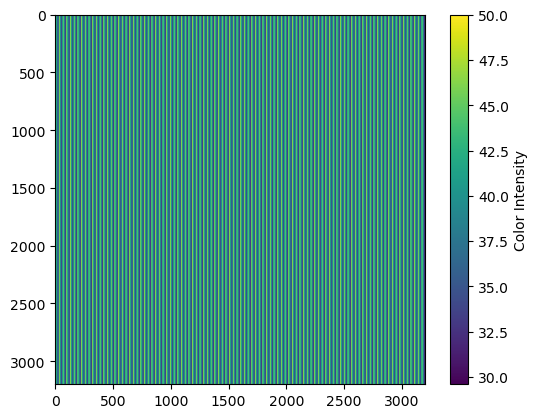

In [9]:
#define a blazed grating and an array of x-coordinates to match it
xarr , gratingArr = ggen.oneDimensionBlazed(n, pixPerPeriod, thickness,\
                                             depth, period, fracPos)

length = xarr[0,-1] #length of grating in microns

plt.imshow(gratingArr)
plt.colorbar(label='Color Intensity')

### Adding Circular Mask
reduces streamfile size and code runtime, and will 
only shape the individual beams of the diffraction order
while maintaining the same efficiencies

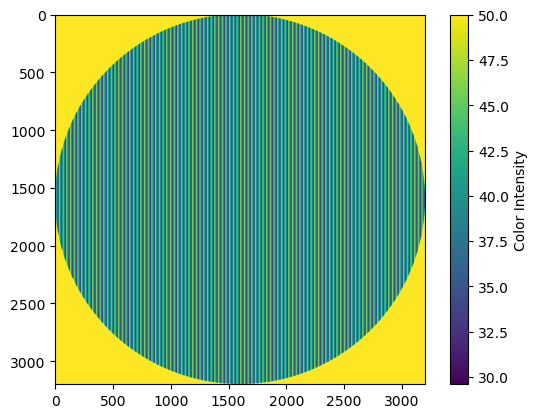

In [10]:
#use the function I already wrote for diffraction
circGratingArr = fd.circleAperture(gratingArr,rfrac = .5)
#this is what we really wanted
circGratingArr[circGratingArr == 0] = thickness

plt.imshow(circGratingArr)
plt.colorbar(label='Color Intensity')

In [11]:
millArrDens, lengthStream = st.streamConversions(hfw,millDens,length,n)

each returned array pixel represents
12.28416 streamfile pixels

mill point spacing values in streamfile pixels
13.1072 

the mill points will be seperated by 
1  pixels in the returned arrays



deltaH (nm):  0.52125
Passes / Layer:  5


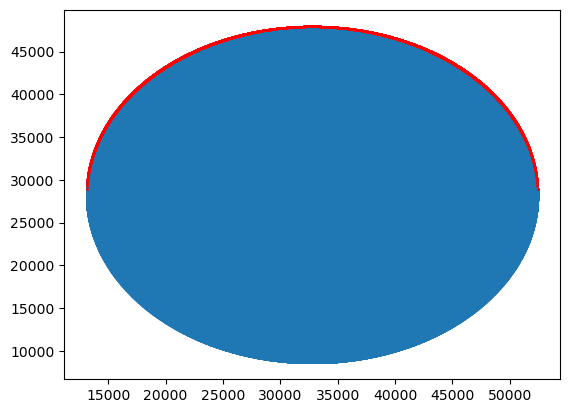

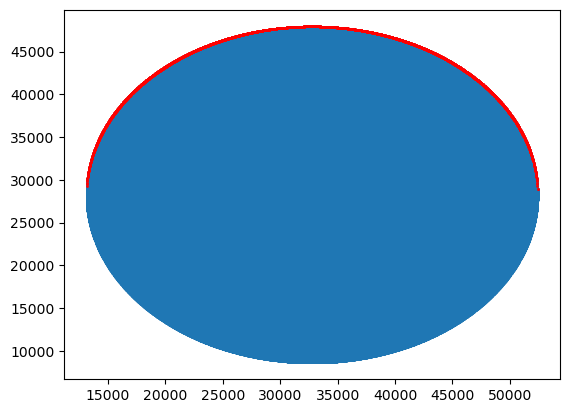

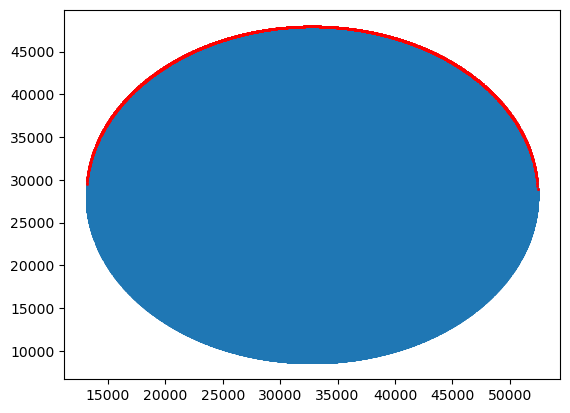

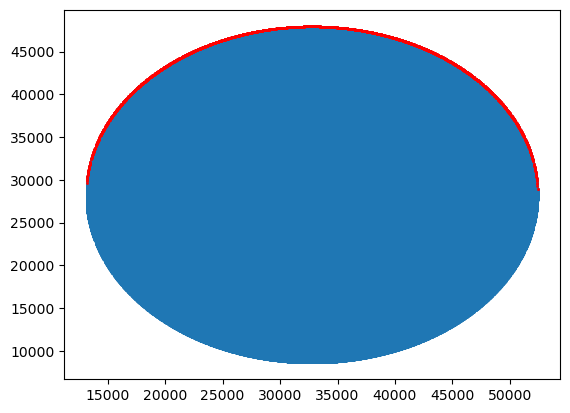

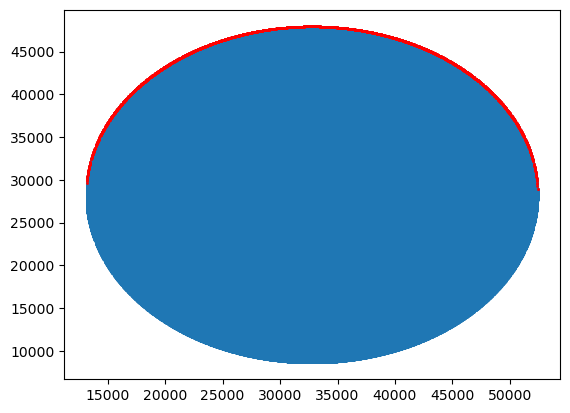

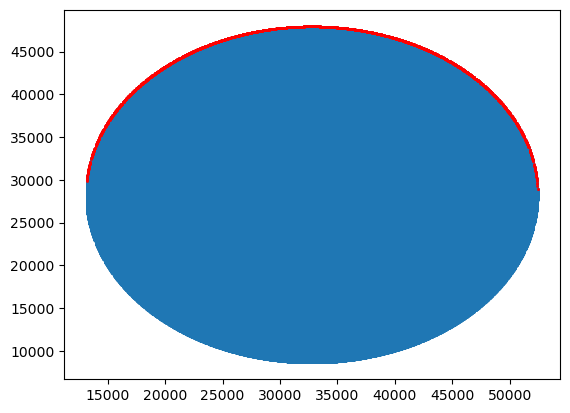

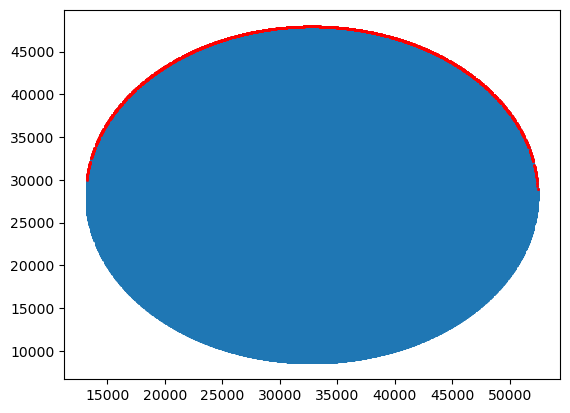

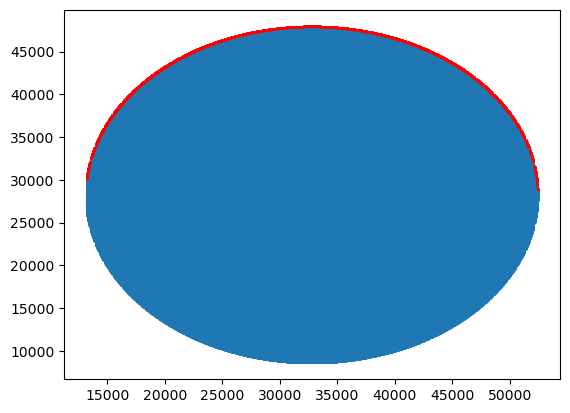

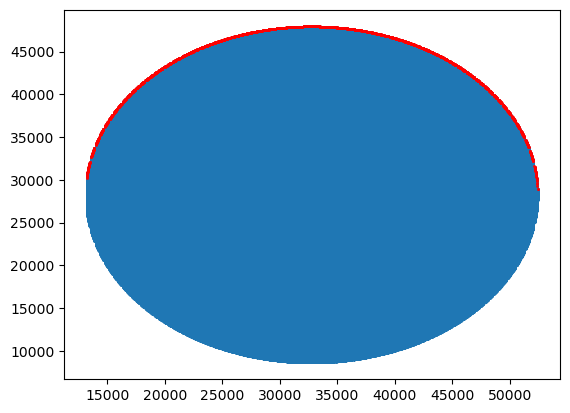

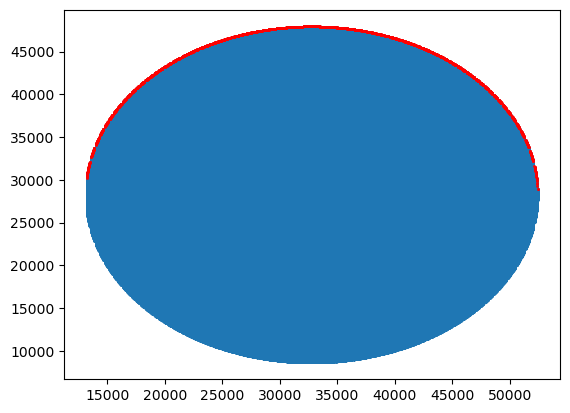

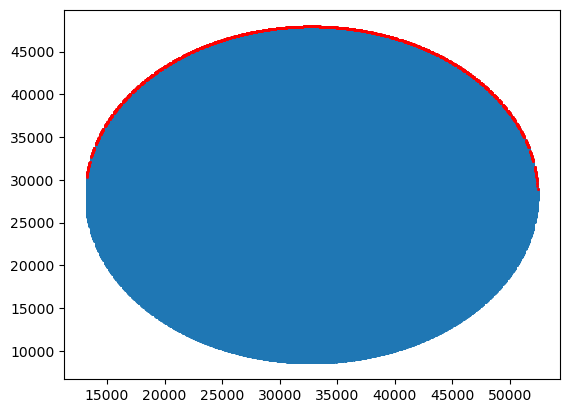

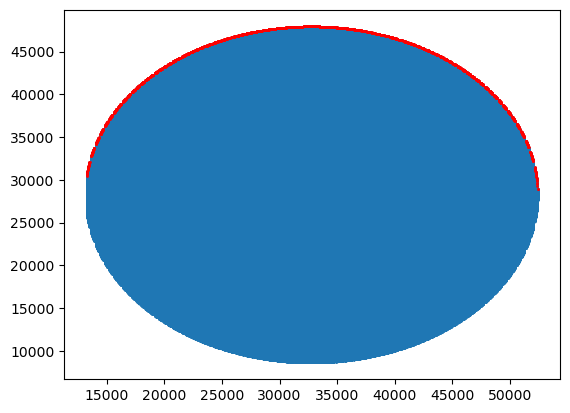

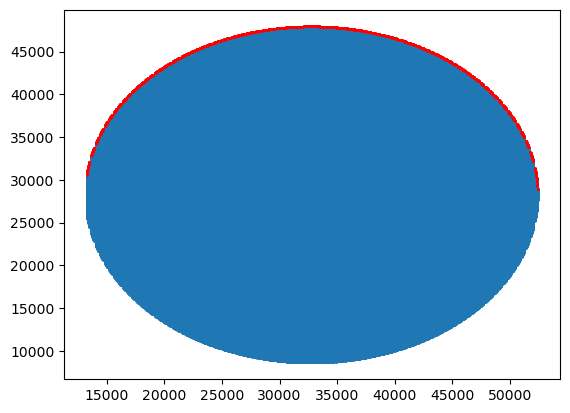

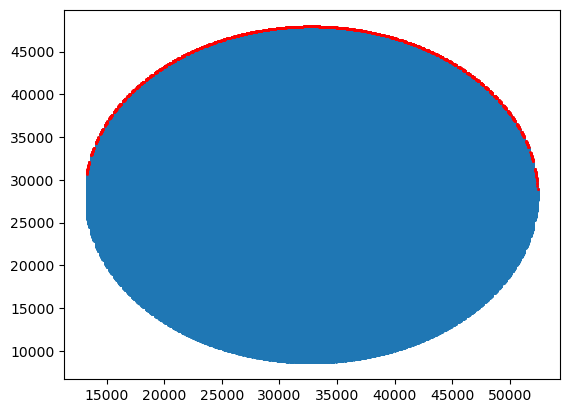

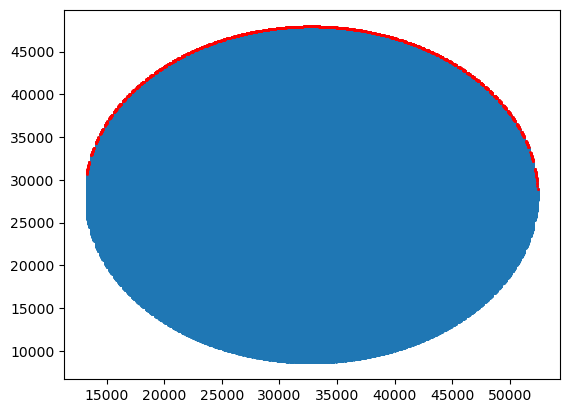

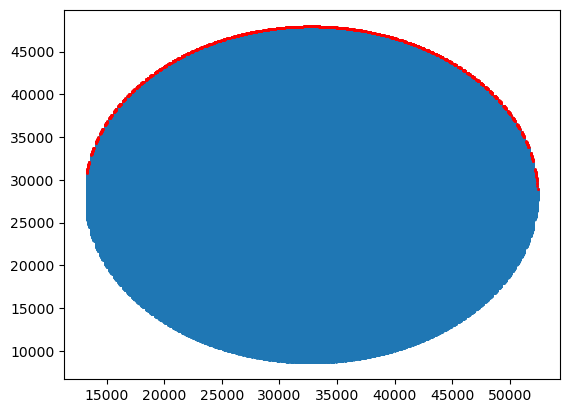

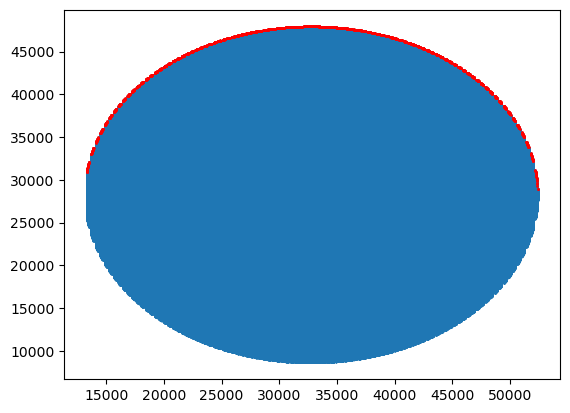

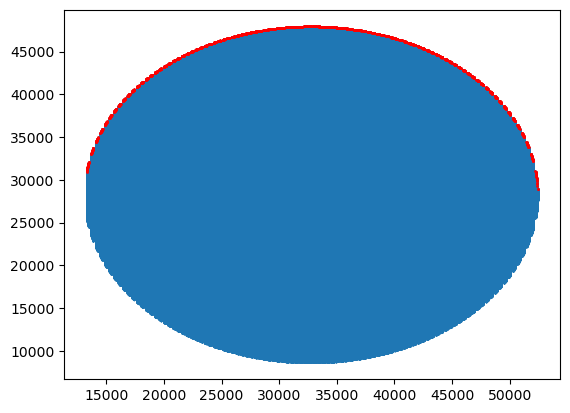

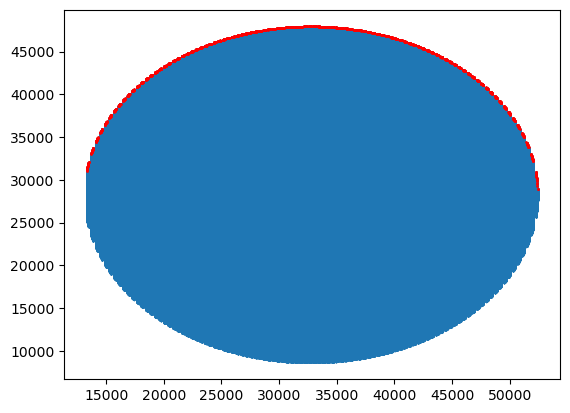

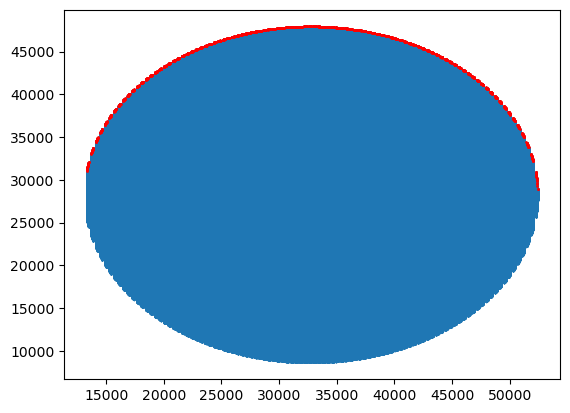

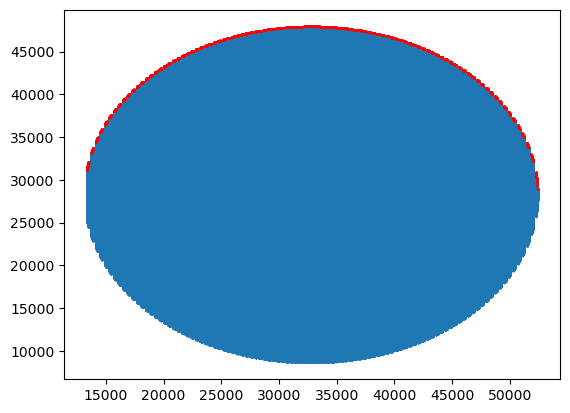

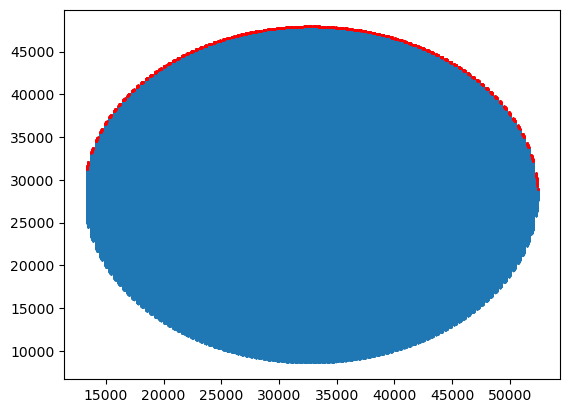

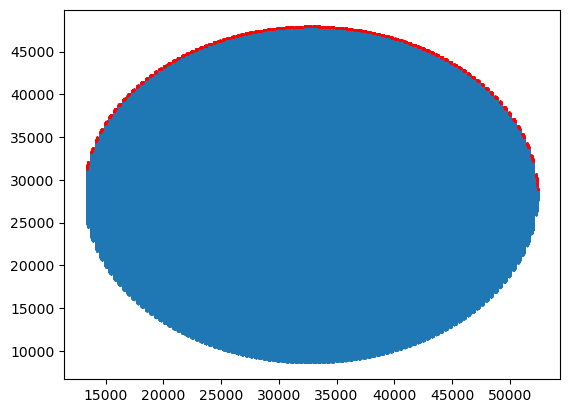

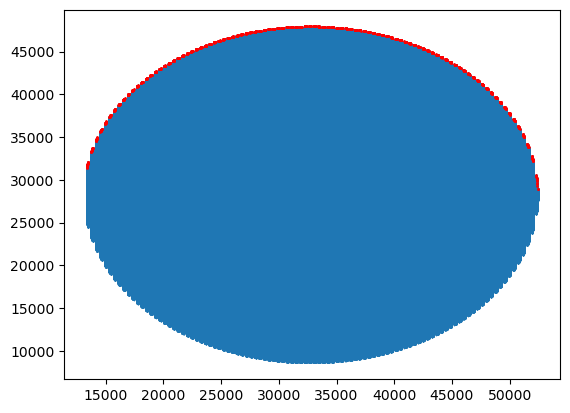

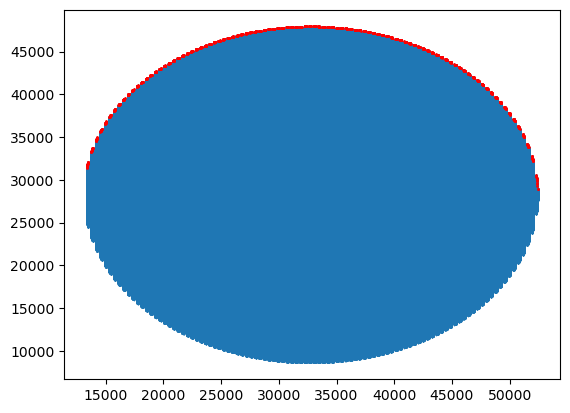

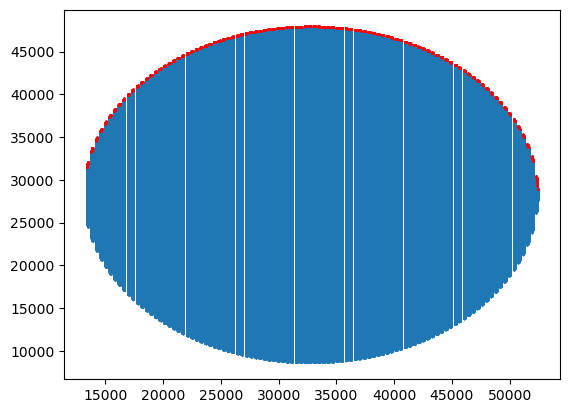

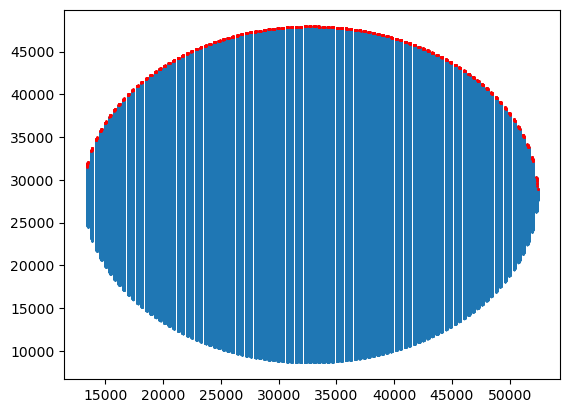

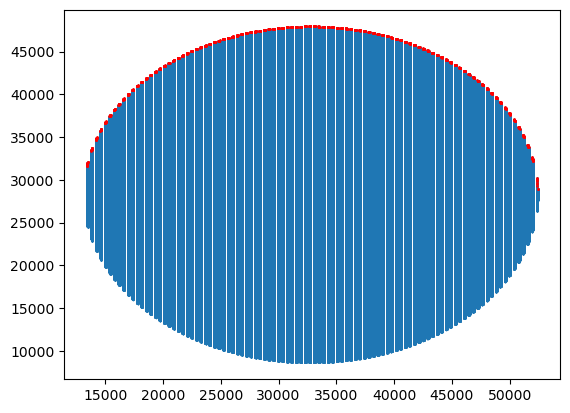

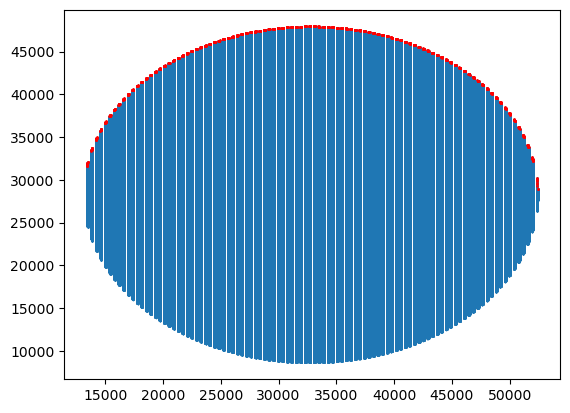

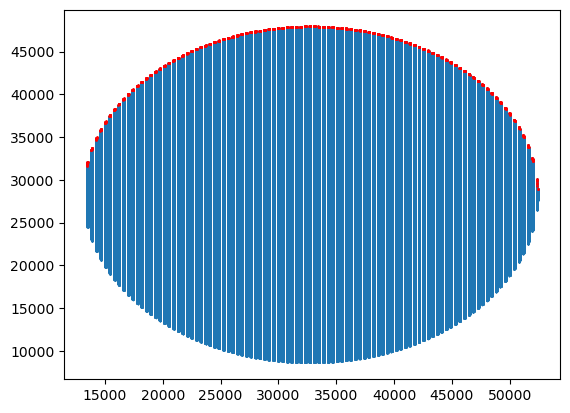

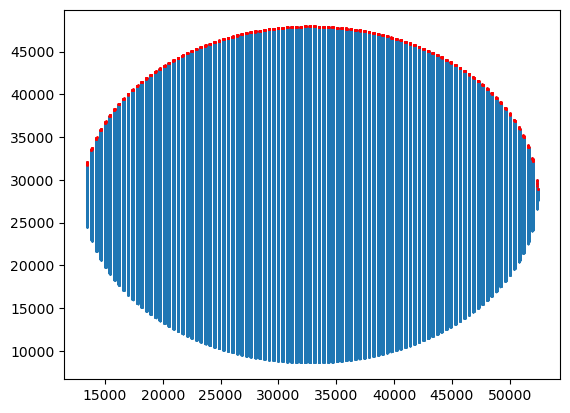

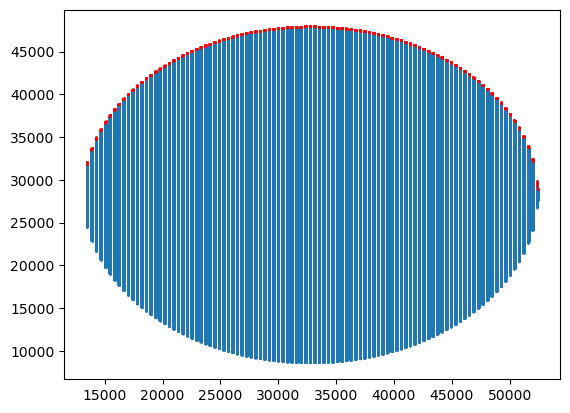

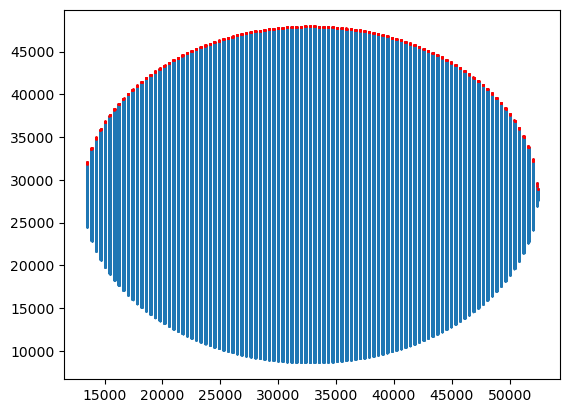

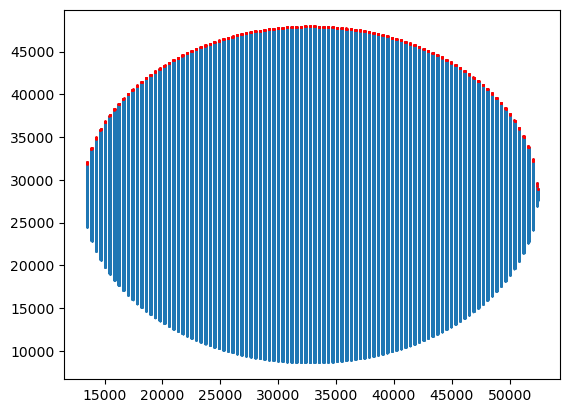

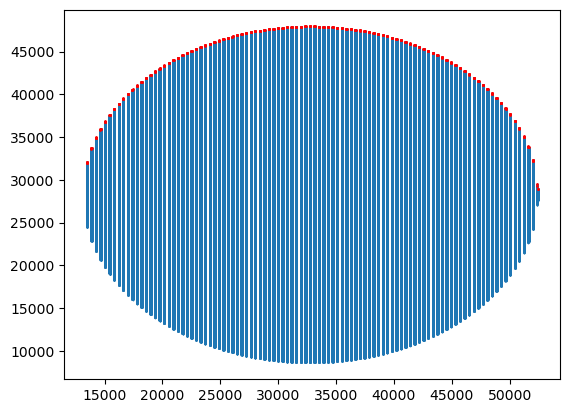

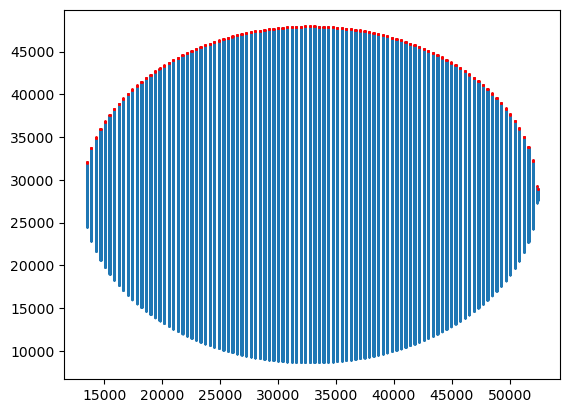

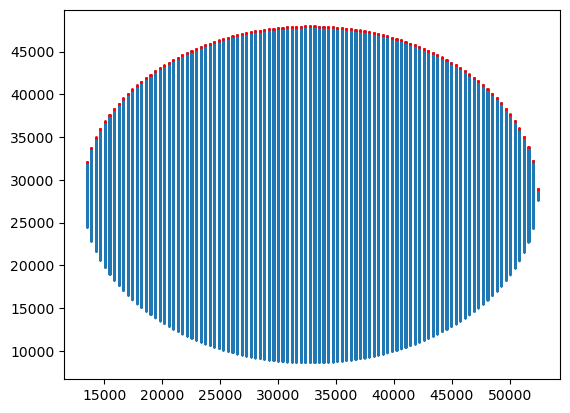

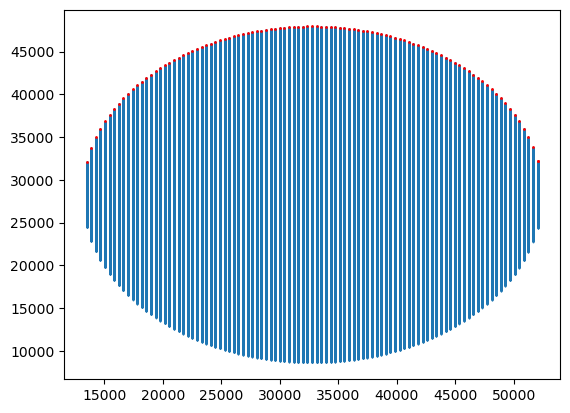

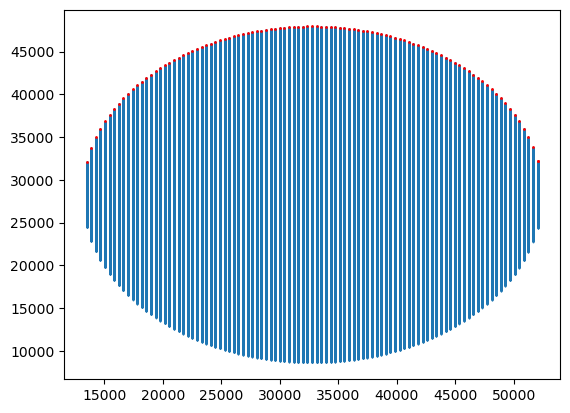

In [13]:
folder = saveFolder
baseName = "blazeFile_"
#there should be a title for the plots generated by this to keep track 

st.sliceStream(folder,baseName,numLayers,depth,nmPerPass,\
                circGratingArr,millArrDens,lengthStream,dwellTime)